In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#
import get_GCM_data
import transform_to_TL_coordinates

### Get GCM output data.

In [2]:
output = {'TS':'TS','CLDTOT':'CLDTOT','U':'U','V':'V'}
state = get_GCM_data.get_GCM("./", ["GCMOutput.nc"], vars_list=output)

### Now convert to TL coords.
### Pick Nlat/Nlon to match GCM's resolution in Earth-like coordinates, otherwise can get different global means!

In [3]:
nlat_tl = state.lat.size  # what resolution desired for interp into TL coords?
nlon_tl = state.lon.size  # 
lon_ss = 180. # at which lon is the substellar point?
state_TL = transform_to_TL_coordinates.transform_state(state,output,(nlat_tl,nlon_tl),lon_ss=lon_ss,do_vel=True)

In [4]:
# note: in this case the time coord only has one entry.
#   get rid of singleton dims with np.squeeze()
for s in [state,state_TL]:
    for var in output:
        x0 = getattr(s,var)
        x1 = np.squeeze(x0)
        setattr(s,var,x1)

### Check global means.

In [5]:
print "global mean Ts in Earth coords = %.3fK" % np.average(np.average(state.TS,axis=-1) * state.weights,axis=-1)
print "global mean Ts in TL coords = %.3fK" % np.nanmean(np.nanmean(state_TL.TS,axis=-1) * state_TL.weights,axis=-1)

global mean Ts in Earth coords = 152.182K
global mean Ts in TL coords = 152.140K


# ----------------

### Make a plot of surface temperature in both coordinate systems

Text(0.5,1,'TS, TL coordinates')

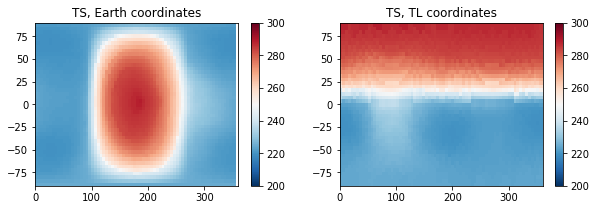

In [6]:
cmap = 'RdBu_r'

plt.figure(figsize=[10,3.])
# -
plt.subplot(1,2,1)
CS = plt.pcolormesh(state.lon,state.lat,state.TS,cmap=cmap,vmin=200,vmax=300)
plt.colorbar(CS)
plt.xlim(0,360)
plt.ylim(-90,90)
plt.title('TS, Earth coordinates')
# -
plt.subplot(1,2,2)
CS = plt.pcolormesh(state_TL.lon,state_TL.lat,state_TL.TS,cmap=cmap,vmin=200,vmax=300)
plt.colorbar(CS)
plt.xlim(0,360)
plt.ylim(-90,90)
plt.title('TS, TL coordinates')